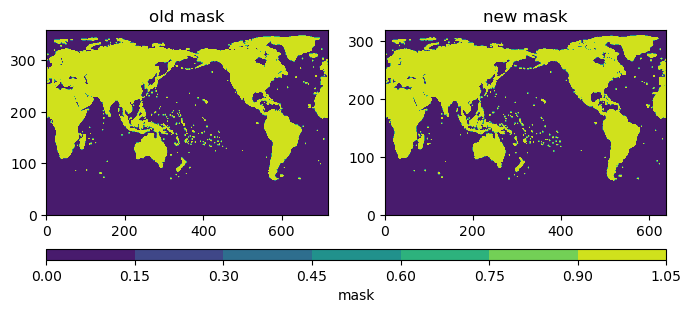

In [1]:
# April 29, 2024
# sglanvil@ucar.edu
# location of this ipynb script: /glade/u/home/sglanvil/analysis/python/analysis/make_land_mask.ipynb
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
import datetime

# original crujra location: /glade/campaign/cgd/tss/people/dll/TRENDY2020_Forcing/three_stream_files/domain.crujra.0.5x0.5.c200728.nc
old_file = "/glade/derecho/scratch/wwieder/domain.crujra.0.5x0.5.c200728.nc"
new_file = "/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/land_forcing/three_stream/domain.JRA55.0.56x0.56.c210708.nc"

ds = xr.open_dataset(old_file)
old_lon = ds.xc[1,:] # old longitude
old_lat = ds.yc[:,1] # old latitude
old_mask = ds.mask

ds = xr.open_dataset(new_file)
new_lon = ds.xc[1,:] # new longitude
new_lat = ds.yc[:,1] # new latitude
new_mask = ds.mask
xc = ds.xc
yc = ds.yc
xv = ds.xv
yv = ds.yv
area = ds.area

interpolator = RectBivariateSpline(old_lat, old_lon, old_mask)
mask = interpolator(new_lat,new_lon)
mask[mask < 0.5] = 0
mask[mask >= 0.5] = 1

# ------------- save to new netcdf file -------------
ds = xr.Dataset()
ds['xc'] = xr.DataArray(xc)
ds['yc'] = xr.DataArray(yc)
ds['xv'] = xr.DataArray(xv)
ds['yv'] = xr.DataArray(yv)
ds['mask'] = xr.DataArray(mask, dims=('nj', 'ni'))
ds['mask'].attrs = new_mask.attrs
ds['area'] = xr.DataArray(area)
ds.attrs['creation_date'] = str(datetime.datetime.now())
ds.attrs['author'] = 'Sasha Glanville (sglanvil@ucar.edu)'
ds.attrs['source_file'] = '/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/land_forcing/three_stream/domain.JRA55.0.56x0.56.c210708.nc'
ds.attrs['notes'] = 'interpolated crujra mask onto JRA55 domain (in order to mimic TRENDY mask where oceans and Antarctica are masked)'
ds.to_netcdf("/glade/u/home/sglanvil/analysis/python/analysis/domain.JRA55withTRENDYmask.0.56x0.56.c240430.nc")

# ------------- plot old mask and new  mask -------------
fig, axs = plt.subplots(1, 2, figsize=(8, 3)) 
cmap = 'viridis'  # Example colormap
im0 = axs[0].contourf(old_mask,cmap=cmap)
axs[0].set_title('old mask')
im1 = axs[1].contourf(mask,cmap=cmap)
axs[1].set_title('new mask')
cbar = fig.colorbar(im1, ax=axs, orientation='horizontal',
                    pad=0.15, fraction=0.05, aspect=60)
cbar.set_label('mask')